# Importing Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/LoanDataset - LoansDatasest.csv')

# Data Understanding

In [3]:
df.shape

(32586, 13)

In [11]:
df.head(25)

,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,cred_hist_length,Current_loan_status
0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,3,DEFAULT
1,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,2,NO DEFAULT
2,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,3,DEFAULT
3,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,2,DEFAULT
4,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,4,DEFAULT
5,21,9900,OWN,2.0,VENTURE,A,"£2,500.00",7.14,1,2,DEFAULT
6,26,77100,RENT,8.0,EDUCATION,A,"£35,000.00",12.42,10,3,NO DEFAULT
7,24,78956,RENT,5.0,MEDICAL,A,"£35,000.00",11.11,10,4,NO DEFAULT
8,24,83000,RENT,8.0,PERSONAL,A,"£35,000.00",8.90,10,2,NO DEFAULT
9,21,10000,OWN,6.0,VENTURE,C,"£1,600.00",14.74,1,3,DEFAULT


In [5]:
df.drop('customer_id',axis=1,inplace=True)

In [7]:
df.isnull().sum()

customer_age               0
customer_income            0
home_ownership             0
employment_duration      895
loan_intent                0
loan_grade                 0
loan_amnt                  1
loan_int_rate           3116
term_years                 0
historical_default     20737
cred_hist_length           0
Current_loan_status        4
dtype: int64

In [9]:
df.drop('historical_default',axis=1,inplace=True)

In [8]:
df.columns

Index(['customer_age', 'customer_income', 'home_ownership',
       'employment_duration', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'term_years', 'historical_default', 'cred_hist_length',
       'Current_loan_status'],
      dtype='object')

In [22]:
df['loan_int_rate']=df['loan_int_rate'].fillna(df['loan_int_rate'].median())

In [18]:
"""def clean_currency(value):
    value = value.replace('£', '').replace(',', '')
    return float(value)
"""

def clean_currency(value):
    if isinstance(value, str):
        # Remove the currency symbol and commas
        value = value.replace('£', '').replace(',', '')
        return float(value)
    else:
        return value

In [19]:
df['loan_amnt'] = df['loan_amnt'].apply(clean_currency)

In [20]:
df['loan_amnt']

0        35000.0
1         1000.0
2         5500.0
3        35000.0
4        35000.0
          ...   
32581     5800.0
32582    17625.0
32583    35000.0
32584    15000.0
32585     6475.0
Name: loan_amnt, Length: 32586, dtype: float64

In [21]:
df['loan_amnt'].fillna(df['loan_amnt'].median(),inplace=True)

In [26]:
df.isnull().sum()

customer_age           0
customer_income        0
home_ownership         0
employment_duration    0
loan_intent            0
loan_grade             0
loan_amnt              0
loan_int_rate          0
term_years             0
cred_hist_length       0
Current_loan_status    0
dtype: int64

In [24]:
df['Current_loan_status']=df['Current_loan_status'].fillna(df['Current_loan_status'].mode()[0])

In [25]:
df['employment_duration']=df['employment_duration'].fillna(df['employment_duration'].median())

In [27]:
df.duplicated().sum()

172

In [28]:
df.drop_duplicates(inplace=True)

In [29]:
df.shape

(32414, 11)

In [30]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [31]:
df['Current_loan_status']=le.fit_transform(df['Current_loan_status'])

In [33]:
df['loan_grade']=le.fit_transform(df['loan_grade'])

In [ ]:
df['customer_type']=le.fit_transform(df['customer_type'])

In [36]:
df['customer_income']=le.fit_transform(df['customer_income'])

In [37]:
df['home_ownership']=le.fit_transform(df['home_ownership'])

In [39]:
df['loan_intent']=le.fit_transform(df['loan_intent'])

<Axes: >

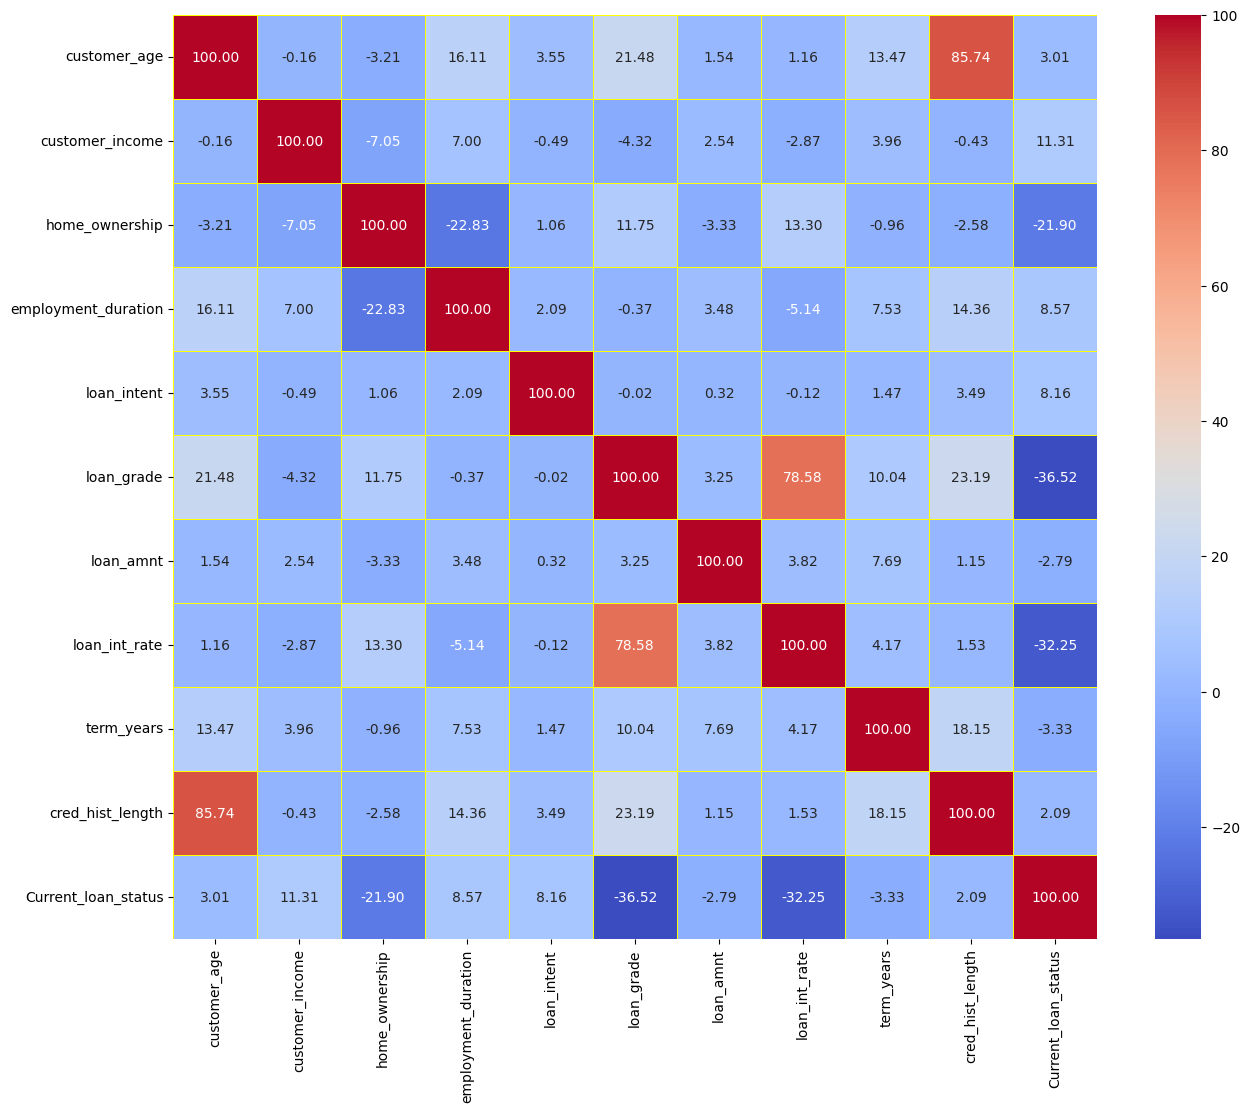

In [43]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr()*100,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5,linecolor='yellow',square=True,cbar=True)

In [44]:
df.describe()

,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,cred_hist_length,Current_loan_status
count,32414.000000,32414.000000,32414.000000,32414.000000,32414.000000,32414.000000,3.241400e+04,32414.000000,32414.000000,32414.000000,32414.000000
mean,27.743043,2186.215401,1.677300,4.767477,2.533967,0.861572,9.733166e+03,11.011762,4.765873,5.810051,0.789566
std,6.363167,1204.961698,1.433095,4.090440,1.730795,1.010296,2.112081e+04,3.082412,2.471484,4.056939,0.407623
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+02,5.420000,1.000000,2.000000,0.000000
25%,23.000000,1252.000000,0.000000,2.000000,1.000000,0.000000,5.000000e+03,8.490000,3.000000,3.000000,1.000000
50%,26.000000,2177.000000,3.000000,4.000000,3.000000,1.000000,8.000000e+03,10.990000,4.000000,4.000000,1.000000
75%,30.000000,3235.000000,3.000000,7.000000,4.000000,1.000000,1.225000e+04,13.110000,7.000000,8.000000,1.000000
max,144.000000,4298.000000,3.000000,123.000000,5.000000,4.000000,3.500000e+06,23.220000,10.000000,30.000000,1.000000


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61],
 [Text(0, 0, '3'),
  Text(1, 0, '6'),
  Text(2, 0, '8'),
  Text(3, 0, '20'),
  Text(4, 0, '21'),
  Text(5, 0, '22'),
  Text(6, 0, '23'),
  Text(7, 0, '24'),
  Text(8, 0, '25'),
  Text(9, 0, '26'),
  Text(10, 0, '27'),
  Text(11, 0, '28'),
  Text(12, 0, '29'),
  Text(13, 0, '30'),
  Text(14, 0, '31'),
  Text(15, 0, '32'),
  Text(16, 0, '33'),
  Text(17, 0, '34'),
  Text(18, 0, '35'),
  Text(19, 0, '36'),
  Text(20, 0, '37'),
  Text(21, 0, '38'),
  Text(22, 0, '39'),
  Text(23, 0, '40'),
  Text(24, 0, '41'),
  Text(25, 0, '42'),
  Text(26, 0, '43'),
  Text(27, 0, '44'),
  Text(28, 0, '45'),
  Text(29, 0, '46'),
  Text(30, 0, '47'),

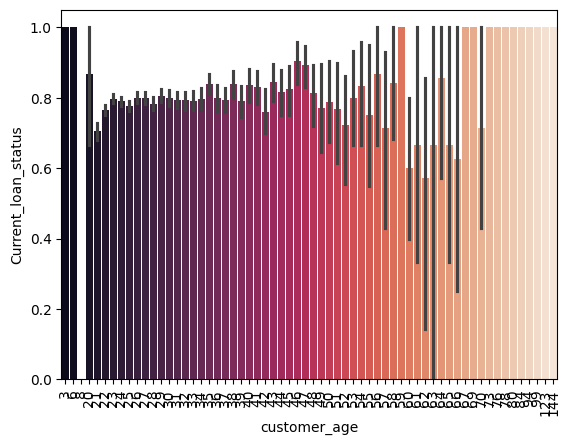

In [47]:
sns.barplot(y='Current_loan_status',x='customer_age',data=df,palette='rocket')
plt.xticks(rotation=90)

<Axes: xlabel='loan_amnt', ylabel='customer_age'>

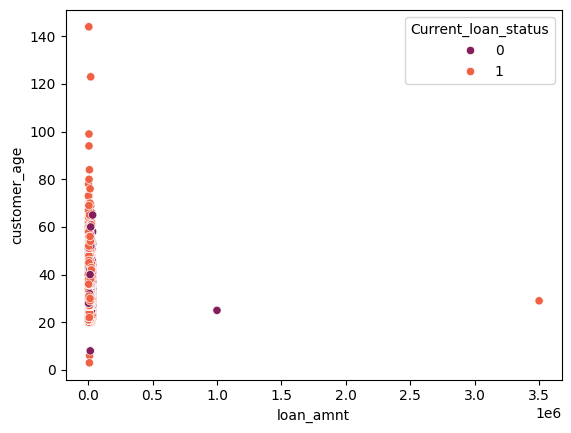

In [48]:
sns.scatterplot(x='loan_amnt',y='customer_age',data=df,hue='Current_loan_status',palette='rocket')

<Axes: xlabel='Current_loan_status', ylabel='Count'>

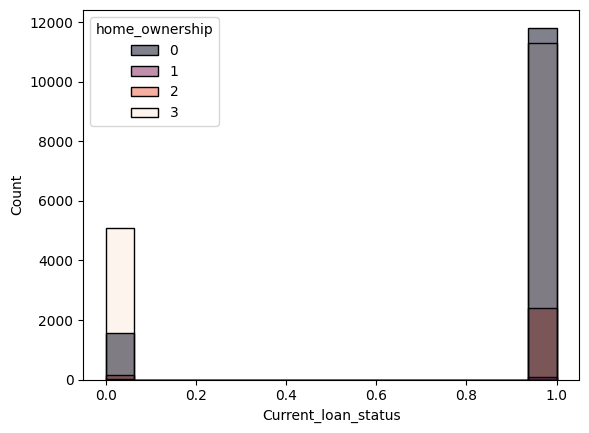

In [50]:
sns.histplot(x='Current_loan_status',hue='home_ownership',data=df,palette='rocket')

<Axes: xlabel='loan_grade', ylabel='customer_age'>

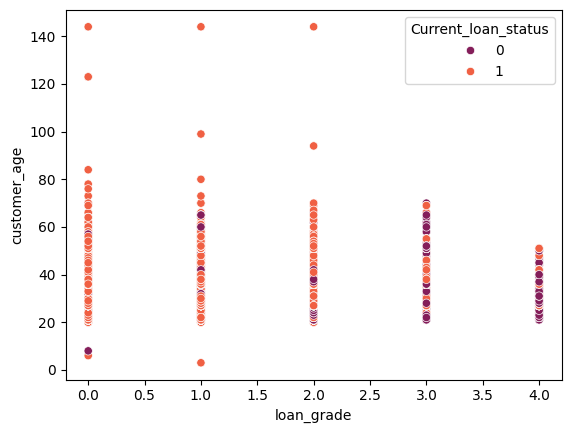

In [51]:
sns.scatterplot(x='loan_grade',y='customer_age',data=df,hue='Current_loan_status',palette='rocket')

<Axes: xlabel='employment_duration', ylabel='Count'>

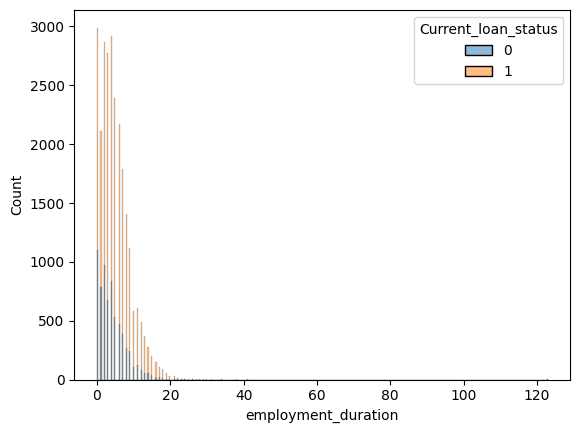

In [52]:
sns.histplot(hue='Current_loan_status',x='employment_duration',data=df)

<Axes: xlabel='loan_grade', ylabel='cred_hist_length'>

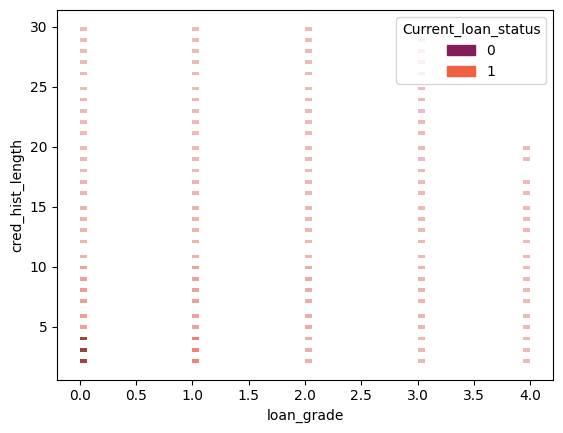

In [53]:
sns.histplot(x='loan_grade',y='cred_hist_length',data=df,hue='Current_loan_status',palette='rocket')

<Axes: xlabel='loan_amnt', ylabel='customer_income'>

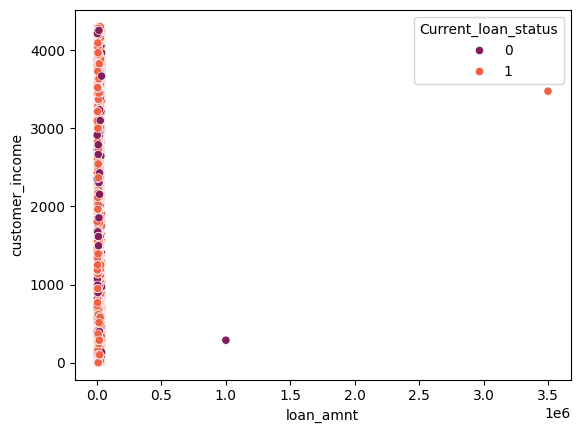

In [54]:
sns.scatterplot(x='loan_amnt',y='customer_income',data=df,hue='Current_loan_status',palette='rocket')

<Axes: xlabel='loan_intent', ylabel='customer_age'>

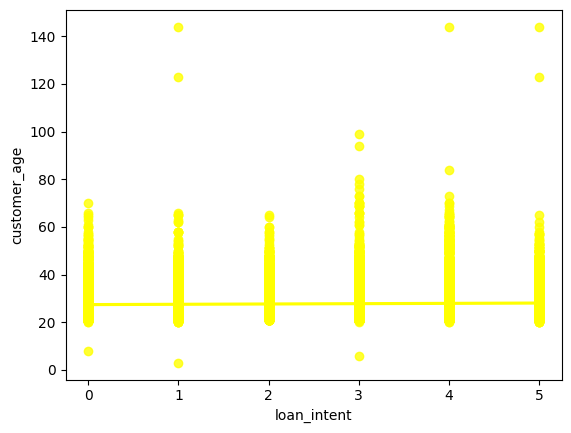

In [59]:
sns.regplot(x='loan_intent',y='customer_age',data=df,color='yellow')

<Axes: xlabel='cred_hist_length', ylabel='customer_income'>

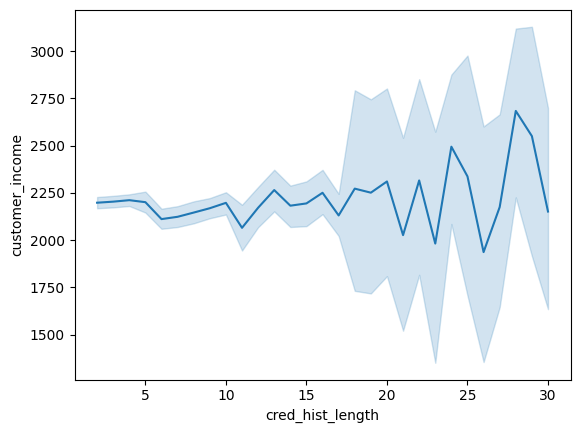

In [63]:
sns.lineplot(x='cred_hist_length',y='customer_income',data=df)

<Axes: xlabel='cred_hist_length', ylabel='Count'>

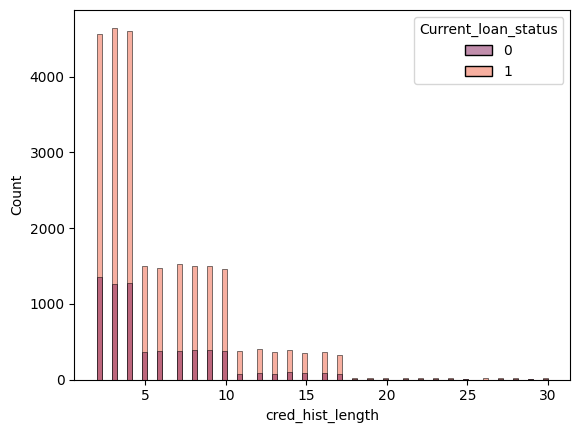

In [65]:
sns.histplot(x='cred_hist_length',hue='Current_loan_status',data=df,palette='rocket')

<Axes: xlabel='loan_int_rate', ylabel='customer_age'>

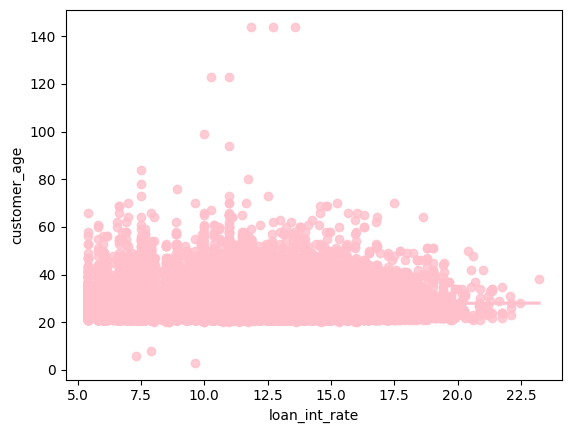

In [67]:
sns.regplot(x='loan_int_rate',y='customer_age',data=df,color='pink')

<Axes: xlabel='loan_intent', ylabel='customer_income'>

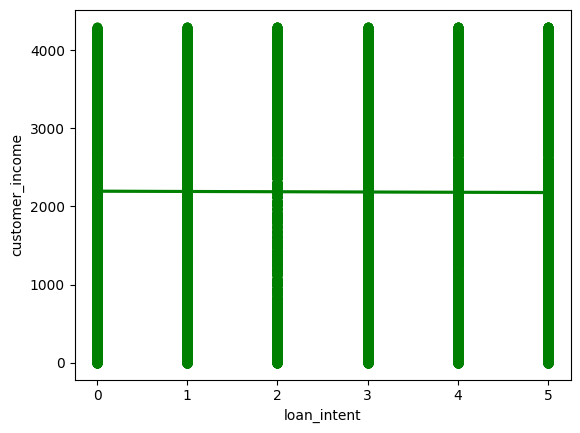

In [68]:
sns.regplot(x='loan_intent',y='customer_income',data=df,color='green')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32414 entries, 0 to 32585
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_age         32414 non-null  int64  
 1   customer_income      32414 non-null  int64  
 2   home_ownership       32414 non-null  int64  
 3   employment_duration  32414 non-null  float64
 4   loan_intent          32414 non-null  int64  
 5   loan_grade           32414 non-null  int64  
 6   loan_amnt            32414 non-null  float64
 7   loan_int_rate        32414 non-null  float64
 8   term_years           32414 non-null  int64  
 9   cred_hist_length     32414 non-null  int64  
 10  Current_loan_status  32414 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 3.0 MB


In [69]:
X=df.drop('Current_loan_status',axis=1)

In [70]:
y=df['Current_loan_status']

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=13)

In [72]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [89]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,max_depth=15)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=15, n_estimators=500)

In [91]:
from sklearn.model_selection import cross_val_score
cross_val_score(gbc,X_train,y_train,cv=5,n_jobs=-1).mean()

0.9190798578613162

In [77]:
param_grid = {
    'n_estimators': [50,100,150, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5,10]
}

In [81]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(gbc, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

KeyboardInterrupt: 